<a href="https://colab.research.google.com/github/AmaniBKL/Projects-ML/blob/main/Unsupervised_ML_Association_Rules_Market_Basket_Optimisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **I. Applying the Apriori algorithm with a simple dataset**

In [ ]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori, association_rules

In [ ]:
# import dataset
dataset = [['Skirt', 'Sneakers', 'Scarf', 'Pants', 'Hat'], 
           ['Sunglasses', 'Skirt', 'Sneakers', 'Pants', 'Hat'], 
           ['Dress', 'Sandals', 'Scarf', 'Pants', 'Heels'], 
           ['Dress', 'Necklace', 'Earrings', 'Scarf', 'Hat', 'Heels', 'Hat'], 
           ['Earrings', 'Skirt', 'Skirt', 'Scarf', 'Shirt', 'Pants']]

In [ ]:
# transform our dataset into a one-hot encoded dataframe
import mlxtend
from mlxtend.preprocessing import TransactionEncoder
t=TransactionEncoder()
te=t.fit(dataset).transform(dataset)    # apply one-hot-encoding on our dataset
df=pd.DataFrame(te, columns=t.columns_)  # creating a new DataFrame from our Numpy array
df

,Dress,Earrings,Hat,Heels,Necklace,Pants,Sandals,Scarf,Shirt,Skirt,Sneakers,Sunglasses
0,False,False,True,False,False,True,False,True,False,True,True,False
1,False,False,True,False,False,True,False,False,False,True,True,True
2,True,False,False,True,False,True,True,True,False,False,False,False
3,True,True,True,True,True,False,False,True,False,False,False,False
4,False,True,False,False,False,True,False,True,True,True,False,False


In [ ]:
# convert dataset into 1 0 encoding
def encoding(x):
    if x == False:
        return 0 
    if x == True:
        return 1
df = df.applymap(encoding)
df

,Dress,Earrings,Hat,Heels,Necklace,Pants,Sandals,Scarf,Shirt,Skirt,Sneakers,Sunglasses
0,0,0,1,0,0,1,0,1,0,1,1,0
1,0,0,1,0,0,1,0,0,0,1,1,1
2,1,0,0,1,0,1,1,1,0,0,0,0
3,1,1,1,1,1,0,0,1,0,0,0,0
4,0,1,0,0,0,1,0,1,1,1,0,0


In [ ]:
# support code
from mlxtend.frequent_patterns import apriori
frequent_itemsets=apriori(df, min_support=0.5, use_colnames=True) # select itemsets with a minimum of 50% support # instead of column indices we can use column names
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets.sort_values("support", ascending=False)

,support,itemsets,length
1,0.8,(Pants),1
2,0.8,(Scarf),1
0,0.6,(Hat),1
3,0.6,(Skirt),1
4,0.6,"(Pants, Scarf)",2
5,0.6,"(Pants, Skirt)",2


In [ ]:
# we have Hat, Pants, Scarf, Skirt, (Pants, Scarf) and (Pants, Skirt) appear with support over 50% in this set of transactions.

In [ ]:
# exploring the itemsets 
frequent_itemsets[ (frequent_itemsets['length'] == 2) & (frequent_itemsets['support'] >= 0.5) ]

,support,itemsets,length
4,0.6,"(Pants, Scarf)",2
5,0.6,"(Pants, Skirt)",2


In [ ]:
# confidence Code
from mlxtend.frequent_patterns import association_rules 
arules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.6) # associate itemsets with confidence over 60%
arules["antecedents_length"] = arules["antecedents"].apply(lambda x: len(x))
arules["consequents_length"] = arules["consequents"].apply(lambda x: len(x))
arules.sort_values("confidence", ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedents_length,consequents_length
3,(Skirt),(Pants),0.6,0.8,0.6,1.00,1.2500,0.12,inf,1,1
0,(Pants),(Scarf),0.8,0.8,0.6,0.75,0.9375,-0.04,0.8,1,1
1,(Scarf),(Pants),0.8,0.8,0.6,0.75,0.9375,-0.04,0.8,1,1
2,(Pants),(Skirt),0.8,0.6,0.6,0.75,1.2500,0.12,1.6,1,1


In [ ]:
# we have the probability of buying Pants after buying Skirt is 1.

In [ ]:
# lift code
from mlxtend.frequent_patterns import association_rules 
arules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
arules["antecedents_length"] = arules["antecedents"].apply(lambda x: len(x))
arules["consequents_length"] = arules["consequents"].apply(lambda x: len(x))
arules.sort_values("lift", ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedents_length,consequents_length
1,(Skirt),(Pants),0.6,0.8,0.6,1.00,1.25,0.12,inf,1,1
0,(Pants),(Skirt),0.8,0.6,0.6,0.75,1.25,0.12,1.6,1,1


In [ ]:
# it is more likely to buy Skirt and Pants together rather than skirt or Pants alones.

In [ ]:
# construction of new dataframe from our dataset
transaction = []
for i in range(0, len(dataset)):
  for j in range(0, len(dataset[i])):
    transaction.append(dataset[i][j]) # transaction here is a list
transaction = np.array(transaction) # transaction here is an array
df = pd.DataFrame(transaction, columns=["items"])
df["incident_count"] = 1
df

,items,incident_count
0,Skirt,1
1,Sneakers,1
2,Scarf,1
3,Pants,1
4,Hat,1
5,Sunglasses,1
6,Skirt,1
7,Sneakers,1
8,Pants,1
9,Hat,1


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

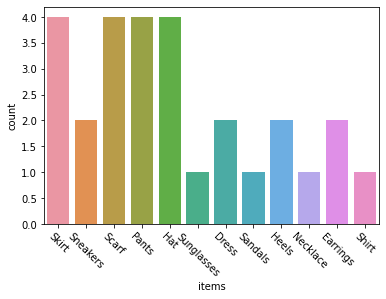

In [ ]:
# visualisation
sns.countplot(x='items', data=df)
plt.xticks(rotation=-45)

In [ ]:
# make a new appropriate pandas dataframe for visualization
ndf = df.groupby("items").sum().sort_values("incident_count", ascending=False).reset_index()
ndf

,items,incident_count
0,Hat,4
1,Pants,4
2,Scarf,4
3,Skirt,4
4,Dress,2
5,Earrings,2
6,Heels,2
7,Sneakers,2
8,Necklace,1
9,Sandals,1


# **II. applying the Apriori algorithm with bigger dataset**

In [ ]:
# loading the data
data = pd.read_csv('/content/Market_Basket_Optimisation.csv', header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data.shape

(7501, 20)

In [ ]:
data.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
count,7501,5747,4389,3345,2529,1864,1369,981,654,395,256,154,87,47,25,8,4,4,3,1
unique,115,117,115,114,110,106,102,98,88,80,66,50,43,28,19,8,3,3,3,1
top,mineral water,mineral water,mineral water,mineral water,green tea,french fries,green tea,green tea,green tea,green tea,low fat yogurt,green tea,green tea,green tea,magazines,chocolate,frozen smoothie,protein bar,mayonnaise,olive oil
freq,577,484,375,201,153,107,96,67,57,31,22,15,8,4,3,1,2,2,1,1


In [ ]:
# transform every transaction to seperate list and gather them into numpy array
transaction = []
for i in range(data.shape[0]):
    transaction.append([str(data.values[i,j]) for j in range(data.shape[1])])
transaction = np.array(transaction)
transaction

array([['shrimp', 'almonds', 'avocado', ..., 'frozen smoothie',
        'spinach', 'olive oil'],
       ['burgers', 'meatballs', 'eggs', ..., 'nan', 'nan', 'nan'],
       ['chutney', 'nan', 'nan', ..., 'nan', 'nan', 'nan'],
       ...,
       ['chicken', 'nan', 'nan', ..., 'nan', 'nan', 'nan'],
       ['escalope', 'green tea', 'nan', ..., 'nan', 'nan', 'nan'],
       ['eggs', 'frozen smoothie', 'yogurt cake', ..., 'nan', 'nan',
        'nan']], dtype='<U20')

In [ ]:
# transform transaction into a one-hot encoded dataframe
import mlxtend
from mlxtend.preprocessing import TransactionEncoder
t=TransactionEncoder()
te=t.fit(transaction).transform(transaction) # apply one-hot-encoding on our dataset
df=pd.DataFrame(te, columns=t.columns_) # creating a new DataFrame from our Numpy array
df = df.drop('nan', axis=1) # dropping nan column
df

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,body spray,bramble,brownies,bug spray,burger sauce,burgers,butter,cake,candy bars,carrots,cauliflower,cereals,champagne,chicken,chili,chocolate,chocolate bread,chutney,cider,clothes accessories,cookies,cooking oil,corn,cottage cheese,cream,dessert wine,eggplant,eggs,energy bar,energy drink,...,oil,olive oil,pancakes,parmesan cheese,pasta,pepper,pet food,pickles,protein bar,red wine,rice,salad,salmon,salt,sandwich,shallot,shampoo,shrimp,soda,soup,spaghetti,sparkling water,spinach,strawberries,strong cheese,tea,tomato juice,tomato sauce,tomatoes,toothpaste,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,True,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,...,False,True,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,True,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False

In [ ]:
# convert df into 1 0 encoding
def encoding(x):
    if x == False:
        return 0 
    if x == True:
        return 1
df = df.applymap(encoding)
df

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,body spray,bramble,brownies,bug spray,burger sauce,burgers,butter,cake,candy bars,carrots,cauliflower,cereals,champagne,chicken,chili,chocolate,chocolate bread,chutney,cider,clothes accessories,cookies,cooking oil,corn,cottage cheese,cream,dessert wine,eggplant,eggs,energy bar,energy drink,...,oil,olive oil,pancakes,parmesan cheese,pasta,pepper,pet food,pickles,protein bar,red wine,rice,salad,salmon,salt,sandwich,shallot,shampoo,shrimp,soda,soup,spaghetti,sparkling water,spinach,strawberries,strong cheese,tea,tomato juice,tomato sauce,tomatoes,toothpaste,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7497,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7498,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7499,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# support code
# extracting the most frequest itemsets
from mlxtend.frequent_patterns import apriori
frequent_itemsets=apriori(df, min_support=0.05, use_colnames=True) # select itemsets with a minimum of 5% support 
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets.sort_values("support", ascending=False)

,support,itemsets,length
16,0.238368,(mineral water),1
6,0.179709,(eggs),1
21,0.174110,(spaghetti),1
8,0.170911,(french fries),1
3,0.163845,(chocolate),1
12,0.132116,(green tea),1
15,0.129583,(milk),1
13,0.098254,(ground beef),1
10,0.095321,(frozen vegetables),1
18,0.095054,(pancakes),1


In [ ]:
# exploring the itemsets 
frequent_itemsets[ (frequent_itemsets['length'] == 2) & (frequent_itemsets['support'] >= 0.05) ].sort_values("support", ascending=False)

,support,itemsets,length
27,0.059725,"(mineral water, spaghetti)",2
25,0.052660,"(chocolate, mineral water)",2
26,0.050927,"(eggs, mineral water)",2


In [ ]:
# confidence Code
from mlxtend.frequent_patterns import association_rules 
arules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.1) # associate itemsets with confidence over 10%
arules["antecedents_length"] = arules["antecedents"].apply(lambda x: len(x))
arules["consequents_length"] = arules["consequents"].apply(lambda x: len(x))
arules.sort_values("confidence", ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedents_length,consequents_length
5,(spaghetti),(mineral water),0.174110,0.238368,0.059725,0.343032,1.439085,0.018223,1.159314,1,1
0,(chocolate),(mineral water),0.163845,0.238368,0.052660,0.321400,1.348332,0.013604,1.122357,1,1
2,(eggs),(mineral water),0.179709,0.238368,0.050927,0.283383,1.188845,0.008090,1.062815,1,1
4,(mineral water),(spaghetti),0.238368,0.174110,0.059725,0.250559,1.439085,0.018223,1.102008,1,1
1,(mineral water),(chocolate),0.238368,0.163845,0.052660,0.220917,1.348332,0.013604,1.073256,1,1
3,(mineral water),(eggs),0.238368,0.179709,0.050927,0.213647,1.188845,0.008090,1.043158,1,1


In [ ]:
# lift code
from mlxtend.frequent_patterns import association_rules 
arules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
arules["antecedents_length"] = arules["antecedents"].apply(lambda x: len(x))
arules["consequents_length"] = arules["consequents"].apply(lambda x: len(x))
arules.sort_values("lift", ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedents_length,consequents_length
4,(mineral water),(spaghetti),0.238368,0.174110,0.059725,0.250559,1.439085,0.018223,1.102008,1,1
5,(spaghetti),(mineral water),0.174110,0.238368,0.059725,0.343032,1.439085,0.018223,1.159314,1,1
0,(chocolate),(mineral water),0.163845,0.238368,0.052660,0.321400,1.348332,0.013604,1.122357,1,1
1,(mineral water),(chocolate),0.238368,0.163845,0.052660,0.220917,1.348332,0.013604,1.073256,1,1
2,(eggs),(mineral water),0.179709,0.238368,0.050927,0.283383,1.188845,0.008090,1.062815,1,1
3,(mineral water),(eggs),0.238368,0.179709,0.050927,0.213647,1.188845,0.008090,1.043158,1,1


In [ ]:
# it is more likely to buy mineral water and spaghetti together rather than mineral water or spaghetti alones.
# it is more likely to buy mineral water and chocolate together rather than mineral water or chocolate alones.
# it is more likely to buy mineral water and eggs together rather than mineral water or eggs alones.

In [ ]:
# gather all items of each transaction into list and transform it into numpy array
transaction = []
for i in range(0, data.shape[0]):
    for j in range(0, data.shape[1]):
        transaction.append(data.values[i,j]) # transaction here is a list
transaction = np.array(transaction) # return an array
transaction

array(['shrimp', 'almonds', 'avocado', ..., 'nan', 'nan', 'nan'],
      dtype='<U20')

In [ ]:
# transform our array into a pandas dataframe
df = pd.DataFrame(transaction, columns=["items"]) 
df["frequency"] = 1 # put 1 to each item for making countable table, to be able to perform group by
df

,items,frequency
0,shrimp,1
1,almonds,1
2,avocado,1
3,vegetables mix,1
4,green grapes,1
...,...,...
150015,nan,1
150016,nan,1
150017,nan,1
150018,nan,1


In [ ]:
# delete nan items from our dataset
indexnan = df[df['items'] == "nan" ].index
df.drop(indexnan , inplace=True)
df

,items,frequency
0,shrimp,1
1,almonds,1
2,avocado,1
3,vegetables mix,1
4,green grapes,1
...,...,...
149981,green tea,1
150000,eggs,1
150001,frozen smoothie,1
150002,yogurt cake,1


In [ ]:
# make a new appropriate pandas dataframe for visualization
ndf = df.groupby("items").sum().sort_values("frequency", ascending=False).reset_index()
ndf

,items,frequency
0,mineral water,1788
1,eggs,1348
2,spaghetti,1306
3,french fries,1282
4,chocolate,1230
...,...,...
115,bramble,14
116,cream,7
117,napkins,5
118,water spray,3


In [ ]:
# initial visualization
tab = ndf.head(10).style.background_gradient(cmap='Blues')
tab

,items,frequency
0,mineral water,1788
1,eggs,1348
2,spaghetti,1306
3,french fries,1282
4,chocolate,1230
5,green tea,991
6,milk,972
7,ground beef,737
8,frozen vegetables,715
9,pancakes,713


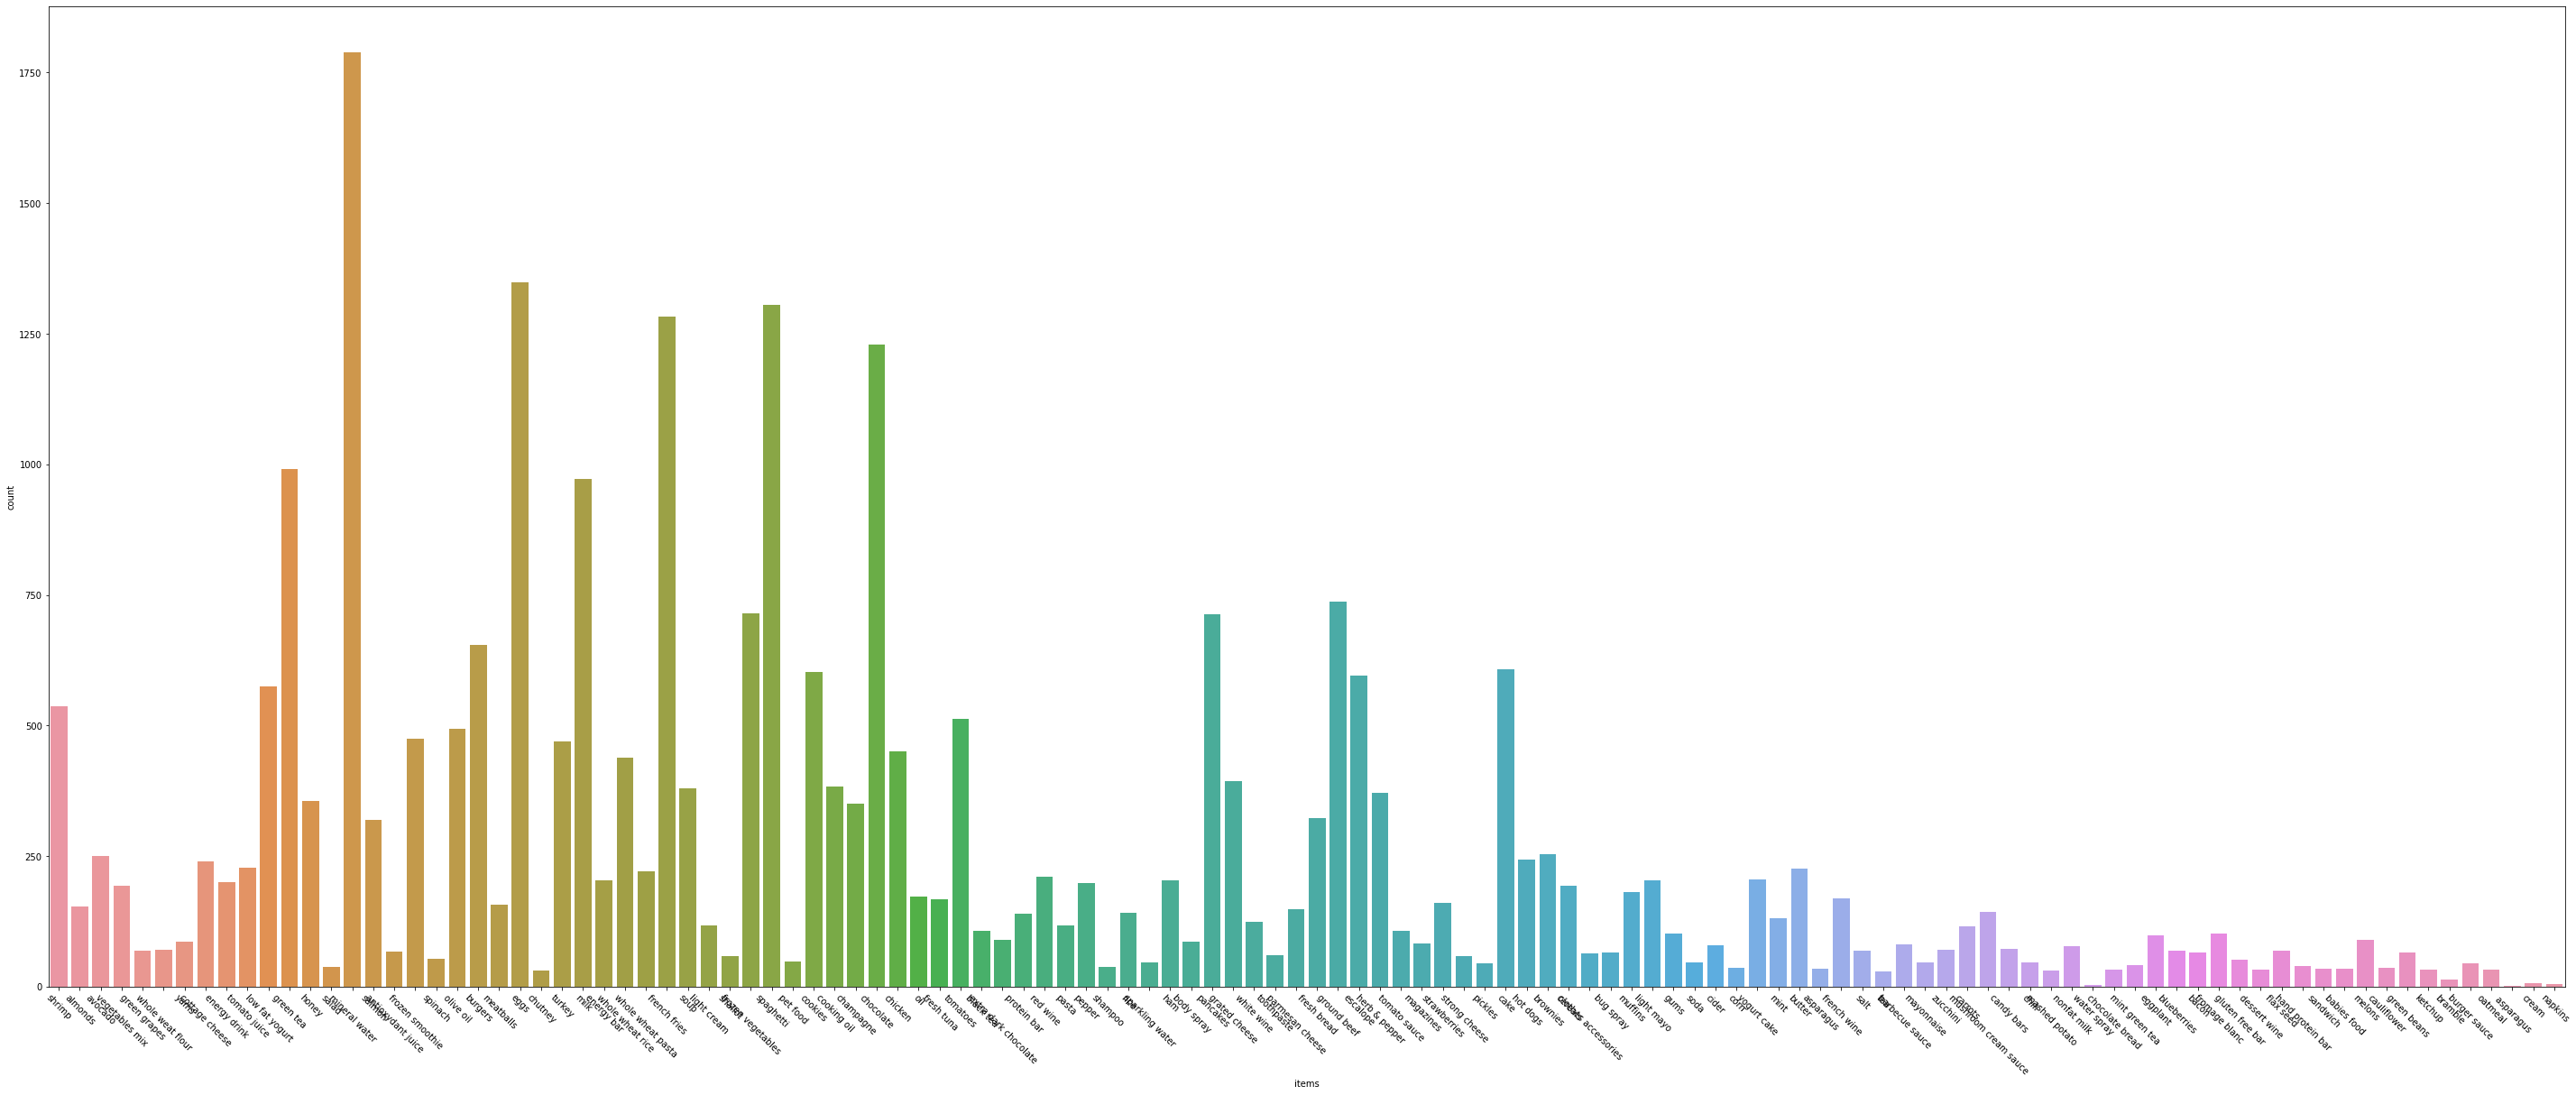

In [ ]:
# visualisation
fig = plt.figure (figsize=(50, 20))
sns.countplot(x='items', data=df)
plt.xticks(rotation=-45)
fig.show()